# <center>FLIGHT DELAY PREDICTIONS</center>

<center><img src="https://www.webintravel.com/wp-content/uploads/2020/05/den-belitsky-GettyImages-854673918-scaled.jpg" width="700"></center>

### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

### Getting our Data

In [6]:
flights = pd.read_csv('flights.csv')
flights

/var/folders/rq/1hcrt6sj51d5l1d_db5952f40000gn/T/ipykernel_57861/3751038646.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
flights_needed_data = flights.sample(n=100000)  # getting a segment 

In [8]:
flights_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3426159,2015,8,2,7,UA,1690,N76254,AUS,EWR,624,...,1056.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4759514,2015,10,24,6,HA,42,N381HA,13830,14771,1435,...,2222.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3855599,2015,8,27,4,NK,403,N510NK,ATL,FLL,1921,...,2103.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2145459,2015,5,17,7,EV,6017,N13988,PIA,ORD,520,...,602.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5505786,2015,12,11,5,DL,1232,N947DN,ATL,DAY,1602,...,1759.0,28.0,0,0,NaN,4.0,0.0,8.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238671,2015,7,21,2,UA,1147,N57855,KOA,LAX,2123,...,504.0,-32.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4161520,2015,9,16,3,AA,258,N3GSAA,DFW,ONT,1700,...,1802.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
296655,2015,1,20,2,US,1766,N716UW,CHS,CLT,1250,...,1338.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5638235,2015,12,20,7,DL,1970,N309DE,MSY,ATL,915,...,1134.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
flights_needed_data.info()  # for an insight into the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3426159 to 3838799
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99728 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       98524 non-null   float64
 11  DEPARTURE_DELAY      98524 non-null   float64
 12  TAXI_OUT             98468 non-null   float64
 13  WHEELS_OFF           98468 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TI

In [10]:
flights_needed_data.value_counts('DIVERTED')  # will tell us the no. of flights which were diverted

DIVERTED
0    99736
1      264
dtype: int64

### Data Visualization

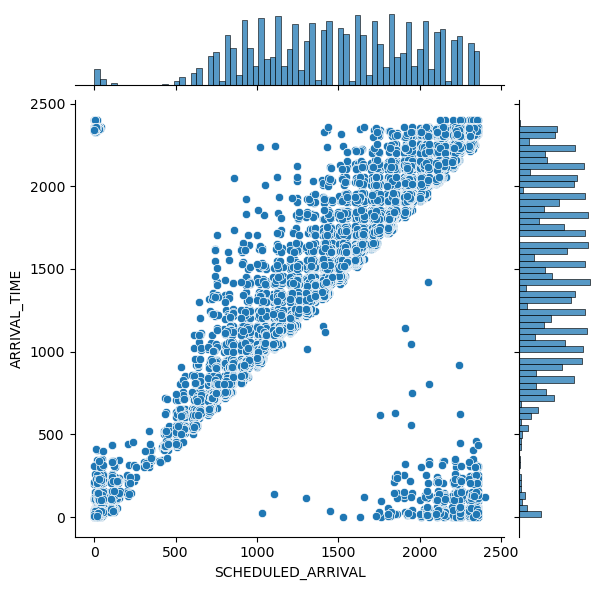

In [11]:
sb.jointplot(data=flights_needed_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

In [12]:
corr = flights_needed_data.corr(method='pearson')

/var/folders/rq/1hcrt6sj51d5l1d_db5952f40000gn/T/ipykernel_57861/1887864288.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = flights_needed_data.corr(method='pearson')


<Axes: >

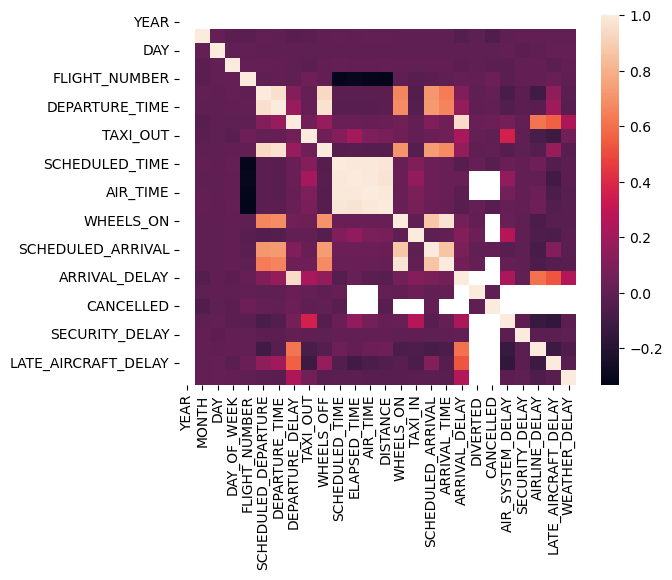

In [13]:
sb.heatmap(corr)

In [14]:
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.011858,-0.010606,-0.019057,0.002339,-0.001825,-0.022006,-0.014701,-0.002325,...,-0.004893,-0.003553,-0.036622,-0.004559,-0.052983,-0.005886,0.007667,0.010326,0.004118,0.001809
DAY,NaN,0.011858,1.000000,0.003851,0.005197,-0.001260,0.000593,-0.001627,-0.003936,0.000140,...,0.000155,-0.001237,-0.002438,0.000533,-0.005445,0.003127,-0.009954,0.001319,0.015443,0.012013
DAY_OF_WEEK,NaN,-0.010606,0.003851,1.000000,0.013510,0.013151,0.011639,-0.008044,-0.018096,0.008929,...,0.011027,0.009193,-0.013076,0.000811,-0.014108,-0.014674,0.006358,0.010843,-0.017949,0.010200
FLIGHT_NUMBER,NaN,-0.019057,0.005197,0.013510,1.000000,-0.001976,0.001815,-0.008339,0.044645,0.008814,...,-0.015374,-0.004238,0.018155,0.003898,0.034458,-0.014972,0.001974,0.003729,0.030434,-0.003658
SCHEDULED_DEPARTURE,NaN,0.002339,-0.001260,0.013151,-0.001976,1.000000,0.963132,0.110614,0.014984,0.934319,...,0.716566,0.640666,0.103080,-0.004459,0.012159,-0.074012,-0.014184,-0.105703,0.147888,-0.017504
DEPARTURE_TIME,NaN,-0.001825,0.000593,0.011639,0.001815,0.963132,1.000000,0.175349,0.021909,0.968606,...,0.720222,0.659120,0.165766,-0.002971,0.004054,-0.047500,-0.010116,-0.028621,0.190342,-0.019657
DEPARTURE_DELAY,NaN,-0.022006,-0.001627,-0.008044,-0.008339,0.110614,0.175349,1.000000,0.054692,0.168137,...,0.097349,0.047471,0.942839,0.028496,0.034240,0.066780,0.002453,0.612631,0.556192,0.236734
TAXI_OUT,NaN,-0.014701,-0.003936,-0.018096,0.044645,0.014984,0.021909,0.054692,1.000000,0.045971,...,0.030233,0.039758,0.224362,0.013050,0.000432,0.363480,-0.003713,-0.076040,-0.122831,0.048867
WHEELS_OFF,NaN,-0.002325,0.000140,0.008929,0.008814,0.934319,0.968606,0.168137,0.045971,1.000000,...,0.734179,0.681104,0.162078,-0.001721,0.002764,-0.032842,-0.009019,-0.036632,0.168701,-0.022421


### Data Preprocessing usign correlation matrix

In [15]:
# filtering out unnecessary columns
flights_needed_data=flights_needed_data.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON'],
                                             axis=1)

In [16]:
flights_needed_data.reset_index(inplace=True)

In [17]:
# replacing all NaN values with the mean of the attribute in which they are present
flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())

/var/folders/rq/1hcrt6sj51d5l1d_db5952f40000gn/T/ipykernel_57861/1638544876.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  flights_needed_data=flights_needed_data.fillna(flights_needed_data.mean())


In [18]:
flights_needed_data = flights_needed_data.drop(columns=['index'])
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,8,2,AUS,EWR,624,4.0,1101,1056.0,-5.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
1,10,24,13830,14771,1435,-9.0,2230,2222.0,-8.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
2,8,27,ATL,FLL,1921,0.0,2114,2103.0,-11.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
3,5,17,PIA,ORD,520,-15.0,616,602.0,-14.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
4,12,11,ATL,DAY,1602,24.0,1731,1759.0,28.0,0,0,4.000000,0.000000,8.000000,16.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7,21,KOA,LAX,2123,-14.0,536,504.0,-32.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
99996,9,16,DFW,ONT,1700,2.0,1810,1802.0,-8.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
99997,1,20,CHS,CLT,1250,-4.0,1359,1338.0,-21.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
99998,12,20,MSY,ATL,915,-5.0,1136,1134.0,-2.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671


In [19]:
# creating a new column; it will tell if the flight was delayed or not
result=[]

In [20]:
for row in flights_needed_data['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)  

In [21]:
flights_needed_data['result'] = result

In [22]:
flights_needed_data

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,8,2,AUS,EWR,624,4.0,1101,1056.0,-5.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
1,10,24,13830,14771,1435,-9.0,2230,2222.0,-8.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
2,8,27,ATL,FLL,1921,0.0,2114,2103.0,-11.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
3,5,17,PIA,ORD,520,-15.0,616,602.0,-14.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
4,12,11,ATL,DAY,1602,24.0,1731,1759.0,28.0,0,0,4.000000,0.000000,8.000000,16.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7,21,KOA,LAX,2123,-14.0,536,504.0,-32.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
99996,9,16,DFW,ONT,1700,2.0,1810,1802.0,-8.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
99997,1,20,CHS,CLT,1250,-4.0,1359,1338.0,-21.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
99998,12,20,MSY,ATL,915,-5.0,1136,1134.0,-2.0,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0


In [23]:
flights_needed_data.value_counts('result')

result
0    82331
1    17669
dtype: int64

In [24]:
# removing some more columns
flights_needed_data=flights_needed_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights_needed_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,8,2,624,4.0,1101,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
1,10,24,1435,-9.0,2230,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
2,8,27,1921,0.0,2114,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
3,5,17,520,-15.0,616,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
4,12,11,1602,24.0,1731,0,0,4.000000,0.000000,8.000000,16.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7,21,2123,-14.0,536,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
99996,9,16,1700,2.0,1810,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
99997,1,20,1250,-4.0,1359,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
99998,12,20,915,-5.0,1136,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0


### Splitting Data for Training and Testing

In [25]:
data = flights_needed_data
X, y = data.iloc[:,:-1], data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)  # splitting in the ratio 70:30

In [39]:
flights_needed_data.to_csv('flights.csv',index=False, header=True)

### Applying Decision Tree Classifier on Training Data

In [40]:
X_train

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
68297,12,23,1035,5.000000,1310,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
77065,11,20,1855,-1.000000,2000,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
66185,7,20,2135,-5.000000,26,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
61601,8,9,910,-4.000000,1319,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
65262,8,5,815,-3.000000,907,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
...,...,...,...,...,...,...,...,...,...,...,...,...
77005,1,14,1859,-1.000000,2030,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
93558,8,26,1400,-1.000000,1529,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
97638,7,27,1635,9.478371,1827,0,1,13.255662,0.075744,18.968022,23.600164,3.036671
41011,11,12,730,4.000000,1020,0,0,13.255662,0.075744,18.968022,23.600164,3.036671


In [41]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

### Making Predictions and Checking Accuracy

In [42]:
pred = clf.predict(X_test)
pred

array([1, 0, 0, ..., 0, 1, 0])

In [43]:
X_test.head()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
33775,7,15,1755,24.0,1855,0,0,0.000000,0.000000,10.000000,11.000000,0.000000
96300,7,12,1300,-3.0,1419,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
36212,6,26,2130,3.0,35,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
36317,9,23,1910,-1.0,2045,0,0,13.255662,0.075744,18.968022,23.600164,3.036671
14784,10,1,748,-4.0,1121,0,0,13.255662,0.075744,18.968022,23.600164,3.036671


In [44]:
# X_test.AIR_SYSTEM_DELAY.min()
X_test.SCHEDULED_DEPARTURE.min()

3

In [45]:
X_test.columns
# X_test.info()


Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [46]:
trsh = pd.DataFrame(columns=['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'])

In [47]:
trsh

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [48]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.9965897269565868

In [49]:
x = pd.read_csv('flights.csv').iloc[:,1:]
x.head()
pd.io.sql.get_schema(x.reset_index(), 'data')

'CREATE TABLE "data" (\n"index" INTEGER,\n  "DAY" INTEGER,\n  "SCHEDULED_DEPARTURE" INTEGER,\n  "DEPARTURE_DELAY" REAL,\n  "SCHEDULED_ARRIVAL" INTEGER,\n  "DIVERTED" INTEGER,\n  "CANCELLED" INTEGER,\n  "AIR_SYSTEM_DELAY" REAL,\n  "SECURITY_DELAY" REAL,\n  "AIRLINE_DELAY" REAL,\n  "LATE_AIRCRAFT_DELAY" REAL,\n  "WEATHER_DELAY" REAL,\n  "result" INTEGER\n)'

In [50]:
flights_needed_data.head()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,8,2,624,4.0,1101,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
1,10,24,1435,-9.0,2230,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
2,8,27,1921,0.0,2114,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
3,5,17,520,-15.0,616,0,0,13.255662,0.075744,18.968022,23.600164,3.036671,0
4,12,11,1602,24.0,1731,0,0,4.000000,0.000000,8.000000,16.000000,0.000000,1


# <center>Predictions are 99.8% accurate.</center>